# Universidade Federal do Rio Grande do Sul (UFRGS)#
## Programa de Pós-Graduação em Engenharia Civil (PPGEC)##
## PEC00025: Introdução à Teoria de Vibrações##
### Trabalho 1 - Resposta de um sistema com 1 grau de liberdade a uma excitação na base: espectro de pseudo acelerações e periodograma###


_Nome: Henrique Cardoso Koch_

_Matrícula: 00312128_

### O trabalho em questão tem como objetivo analisar a resposta de um sistema com um grau de liberdade a uma excitação na base. Para tal, efetuou-se a medição da vibração, com o auxílio do aplicativo iNVH da Bosch em uma regua sob dois apoios simples, sendo aplicado ao longo do tempo pequenos deslocamentos no centro do vão.###



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from MRPy import MRPy

In [3]:
m  = 0.1      # system mass in kg
Tn = np.linspace(0.2,10,1000)
fn = 1.0/Tn    # natural frequency in Hz
zt = 0.01      # damping as ratio of critical
u0 = 0.        # initial displacement
v0 = 0.        # initial velocity

Conforme medido com o iNVH, temos as vibrações nos 3 sentidos de força. Segue gráficos abaixo:

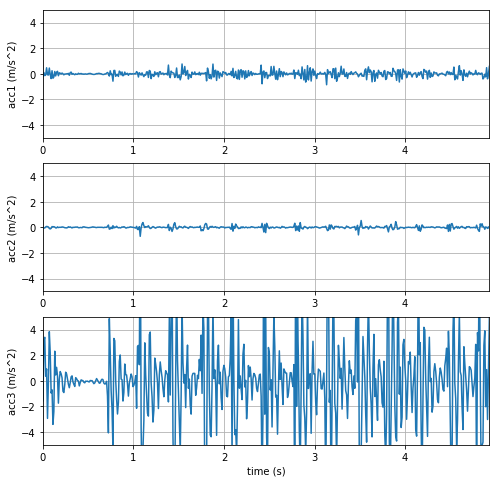

In [4]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(6, figsize=(8, 8), clear=True)

for kX, acc in enumerate(data):
    
    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-5, 5);
    plt.ylabel('acc{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('time (s)');

Para a análise deste trabalho será usado apenas a componente "z" da vibração que corresponde ao deslocamento vertical da régua. A seguir seguem as utilizações de Duhamel e o Periodograma solicitado.

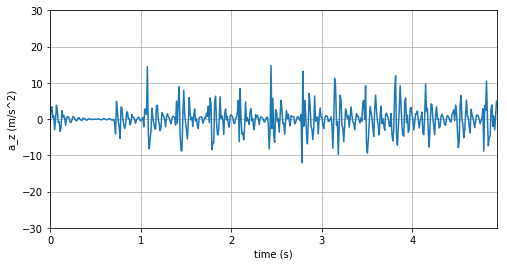

In [10]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(2, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0, az.Td);  plt.xlabel('time (s)') 
plt.ylim(-30, 30);   plt.ylabel('a_z (m/s^2)') 

plt.grid(True)

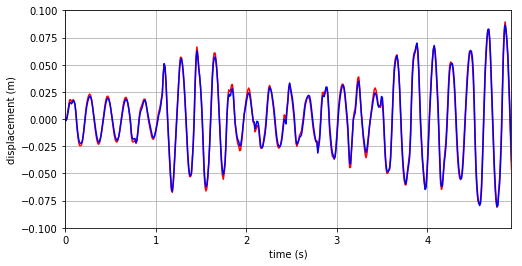

In [12]:
u_FD = az.sdof_fdiff  (fn, zt, u0, v0)/m
u_DH = az.sdof_Duhamel(fn, zt, u0, v0)/m

plt.figure(5, figsize=(8, 4), clear=True)
plt.plot(t, u_FD[0], 'r', t, u_DH[0], 'b')

plt.xlim(0, az.Td);        plt.xlabel('time (s)') 
plt.ylim(-0.1, 0.1);   plt.ylabel('displacement (m)') 

plt.grid(True)

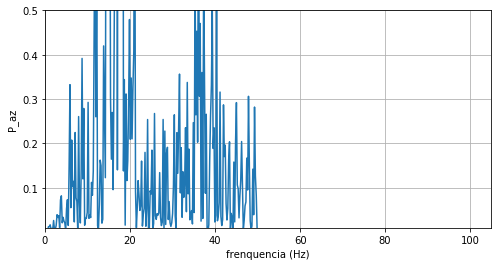

In [13]:
P_az, fs = az.periodogram() #função periodograma
f = az.f_axis()
plt.figure(4, figsize=(8, 4), clear=True)
plt.plot(f, P_az[0])

plt.xlim(0, 105);  plt.xlabel('frenquencia (Hz)') 
plt.ylim(0.01, .5);   plt.ylabel('P_az') 

plt.grid(True)


Por último é apresentado o gráfico de pseuespectro:

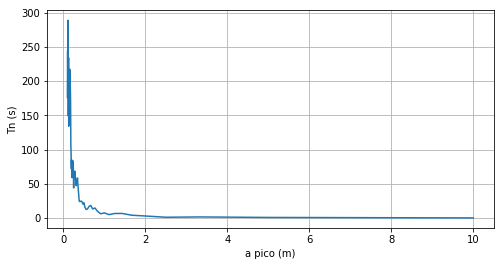

In [14]:
fn   =  np.linspace(0.1, 10, 100)


u_max = []

for i in fn:
    u_DH = az.sdof_Duhamel(i, zt, u0, v0)/m
    u_max.append(u_DH.max())

wn = [2*np.pi*i for i in fn]
wn2 = np.array(wn)**2
umax_ray = np.array(u_max)

a_pico = np.multiply(wn2, umax_ray)
#a_pico = np.array([wn*umax_ray])
tn = [2*np.pi/x for x in wn]
Tn = np.array(tn)
u_max = np.array(u_max)


plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(Tn, a_pico)

#plt.xlim(0.1, .5);        
plt.xlabel('a pico (m)') 
#plt.ylim(0.01, 5);   
plt.ylabel('Tn (s)') 

plt.grid(True)